In [ ]:
cd ..

/blue/adamginsburg/adamginsburg/jwst/cloudc/code/lactea-filament/lactea-filament


In [ ]:
from catalog_query import get_VVV_catalog
import cutout_manager

import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table

import regions
from regions import Regions

In [ ]:
pos_ctr = SkyCoord('17:46:20.9063719501', '-28:37:51.6942550990', unit=(u.hourangle, u.deg))

In [ ]:
position_HMSFR = SkyCoord('17:46:21.4669695284', '-28:35:38.1118497742', unit=(u.hourangle, u.deg))


In [ ]:
cutout_405 = cutout_manager.get_cutout_405(position_HMSFR, 8*u.arcmin, 3*u.arcmin, basepath='~/research/Research/JWST/')

FileNotFoundError: [Errno 2] No such file or directory: '/home/savannahgramze/research/Research/JWST//cloudc/images/F405_reproj_merged-fortricolor.fits'

In [ ]:
cat_VVV = get_VVV_catalog(position_HMSFR, w=3*u.arcmin, l=8*u.arcmin)
#get_VVV_catalog(pos_ctr, w=2*u.arcmin, l=2*u.arcmin)
print(len(cat_VVV))

9023


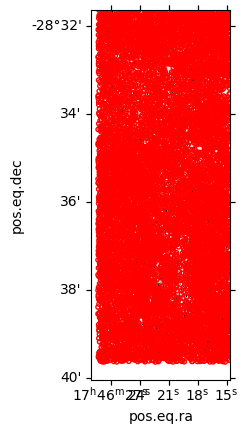

In [ ]:
ax = plt.subplot(projection=cutout_405.wcs)

ax.imshow(cutout_405.data, cmap='Greys', vmin=0, vmax=50)
ax.scatter(cat_VVV['RAJ2000'], cat_VVV['DEJ2000'], transform=ax.get_transform('world'), s=10, facecolor='none', edgecolor='red')

Text(0.5, 0, 'H-Ks')

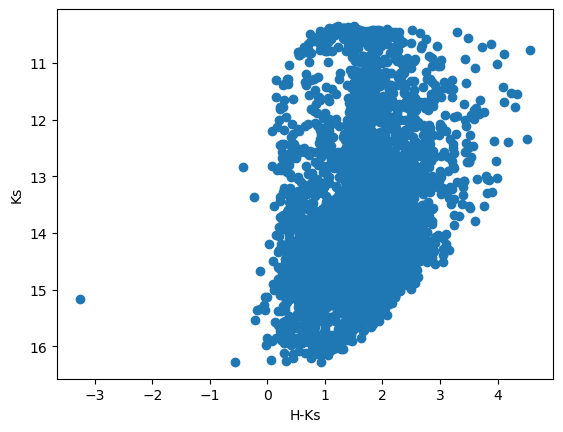

In [ ]:
color = cat_VVV['H1ap1'] - cat_VVV['Ks1ap1']
mag = cat_VVV['Ks1ap1']

plt.figure()
plt.scatter(color, mag)

plt.gca().invert_yaxis()
plt.ylabel('Ks')
plt.xlabel('H-Ks')

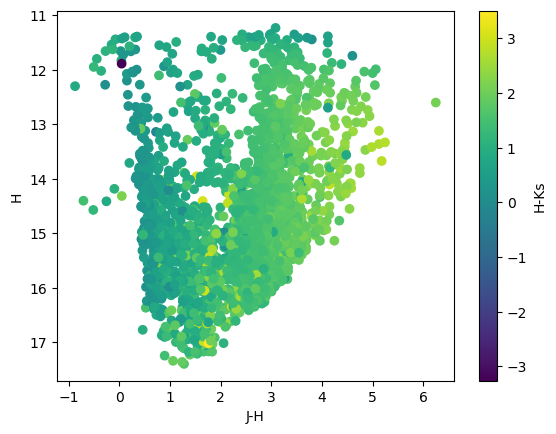

In [ ]:
color = cat_VVV['J1ap1'] - cat_VVV['H1ap1']
mag = cat_VVV['H1ap1']
color2 = cat_VVV['H1ap1'] - cat_VVV['Ks1ap1']

plt.figure()
im = plt.scatter(color, mag, c=color2, cmap='viridis')

plt.gca().invert_yaxis()
plt.ylabel('H')
plt.xlabel('J-H')
plt.colorbar(im, label='H-Ks')

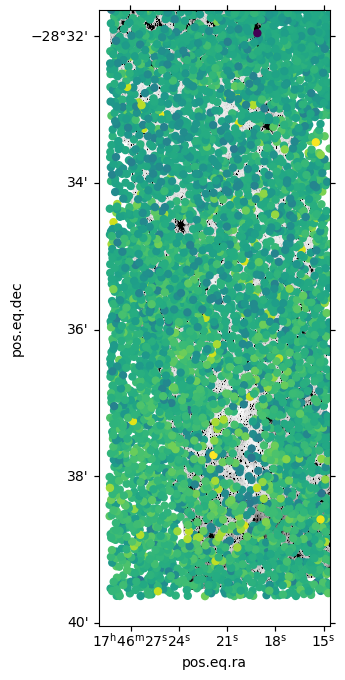

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(projection=cutout_405.wcs)

ax.imshow(cutout_405.data, cmap='Greys', vmin=0, vmax=50)
ax.scatter(cat_VVV['RAJ2000'], cat_VVV['DEJ2000'], transform=ax.get_transform('world'), s=25, facecolor='none', c=color2, cmap='viridis')

In [ ]:
color1 = cat_VVV['J1ap1'] - cat_VVV['H1ap1']
color2 = cat_VVV['H1ap1'] - cat_VVV['Ks1ap1']

plt.figure()
plt.scatter(color, mag)

plt.gca().invert_yaxis()
plt.ylabel('H')
plt.xlabel('J-H')

NameError: name 'cat_VVV' is not defined